<a href="https://colab.research.google.com/github/gachet/mis-colabs/blob/master/Ejercicios_newton_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raíces de ecuaciones no lineales

El propósito de los métodos numéricos para búsqueda de raíces para ecuaciones no lineales es encontrar la raíz - o el valor de la variable independiente, ej. x - que hace que la ecuación  valga cero . La forma general de la búsqueda de raíces para ecuaciones no lineales se puede describir como:

Encontrar una  $x$ tal que
\begin{equation}
f(x) = 0
\end{equation}

Alternativamente, se puede presentar el problema como:

Encontrar una  $x$ tal que 
\begin{equation}
f(x) = a
\end{equation}

Si igualamos la ecuación a 0 forma residual tenemos
\begin{equation}
r(x) \equiv f(x) - a
\end{equation}
y el problema se centra en encontrar una  $x$ tal que 
\begin{equation}
r(x) = 0
\end{equation}


## Método de Newton
El método de Newron es uno de los más populares para encontrar la raíz de una ecuación no lineal. Se basa en la aproximación de una función $f(x)$ tomando dos términos de la serie de Taylor. Dado un valor inicial próximo a la raíz que estamos buscando $x_0$, el método de Newotn se implementa mediante los siguientes pasos:
1. Escogemos $x_0$ as como valor inicial (depende de la idea que tengamos de cómo es f(x))
2. Calculamos $f(x^0)$ and $f'(x^0)$
3. Calculamos $x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}$
3. Hacemos $x_0 = x_1$
4. Vemos si hay convergencia ($f(x_0))$ es semejante a 0, repetimos los pasos si es necesario

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
def newton(f,df,x0,tol,maxiter):
    niter = 0
    err = tol + 100
    print('{:<12} {:<12} {:<12}'.format('Iteración','x1','error'))
    while err > tol and niter < maxiter:
        x1 = x0 - f(x0)/df(x0)
        x0 = x1
        err = abs(f(x0))
        niter += 1
        print('{:<12} {:<12} {:<12}'.format(niter, round(x1,6), round(err,10)))
    if niter == maxiter:
        print('Iteraciones alcanzadas sin solucion =',niter)
    else:
        print('solución %8.6f' % (x1))
        print('alcanzada en %3d iteraciones' % (niter))
        print('valor de la función = %12.10f' % (f(x1)))
    return               

### Aproximando la derivada en el método de Newton

#### Como sabemos por definición la derivada de una función es:
${f}'(x)=\displaystyle \lim_{h \to \infty}\frac{f(x+h)-f(x)}{h}
$

#### podemos tomar diferencias hacia adelante
$
\displaystyle f^{\prime }(x_{0})\approx \frac {f(x_{0}+h)-f(x_{0})}{h}
$

#### podemos tomar diferencias hacia atrás
$
\displaystyle f^{\prime }(x_{0})\approx \frac {f(x_{0})-f(x_{0}-h)}{h}
$

#### Se obtiene una mejor aprocimacion utilizando diferencias centrales
$
\displaystyle f^{\prime }(x_{0})\approx \frac {f(x_{0}+h)-f(x_{0}-h)}{2h}
$

### Podemos implementar el método de Newton aproximando la derivada

In [0]:
def newton2(f,x0,tol,maxiter):
    niter = 0
    err = tol + 100
    print('{:<12} {:<12} {:<12}'.format('Iteración','x1','error'))
    h = 1e-6 
    while err > tol and niter < maxiter:
        df = (f(x0 + h) - f(x0-h))/(2*h)
        x1 = x0 - f(x0)/df
        x0 = x1
        err = abs(f(x0))
        niter += 1
        print('{:<12} {:<12} {:<12}'.format(niter, round(x1,6), round(err,10)))
    if niter == maxiter:
        print('Iteraciones alcanzadas sin solucion =',niter)
    else:
        print('solución %8.6f' % (x1))
        print('alcanzada en %3d iteraciones' % (niter))
        print('valor de la función = %12.10f' % (f(x1)))
    return                 

####  Ejemplo 1.- Econtremos la primera raíz de la siguiente ecuación<br>
$
\ln(x) + \cos(x)e^{-0.1x} = 2
$<br><br>
o en forma su lugar<br><br>
$
 res(x) = \ln(x) + \cos(x)e^{-0.1x} - 2 = 0
$<br>

La función tiene tres raices , 5.309, 8.045, and 10.02. Utilizaremos un valor de raíz de inicio $x_0=1$

Siendo su derivada <br>
$\displaystyle{res}'(x) = -e^{-0.1x}\sin(x)-0.1e^{-0.1x}\cos(x)+ \frac{1}{x}$

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

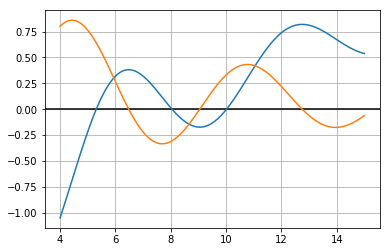

In [0]:
res = lambda x: np.log(x) + np.cos(x)*np.exp(-0.1*x)-2.0
resprima = lambda x: -np.exp(-0.1*x)*np.sin(x)-0.1*np.exp(-0.1*x)*np.cos(x)+(1/x)
x = np.linspace(4,15,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,res(x))
plt.plot(x,resprima(x))

In [0]:
newton(res,resprima,1,1e-5,50)

Iteración    x1           error       
1            8.965097     0.1723003668
2            3.728423     1.2575565862
3            5.507258     0.1175788215
4            5.291207     0.0116828843
5            5.309183     7.3607e-05  
6            5.309297     3e-09       
solución 5.309297
alcanzada en   6 iteraciones
valor de la función = -0.0000000030


In [0]:
newton2(res,1,1e-5,50)

NameError: ignored

####  Ejemplo 2 .- Encontrar la raiz de <br>
$
f(x) = x^{10} -1
$ empezando con un valor inicial  $0.6$ <br><br>
con una tolerancia del 2% y dibujar la función<br><br>


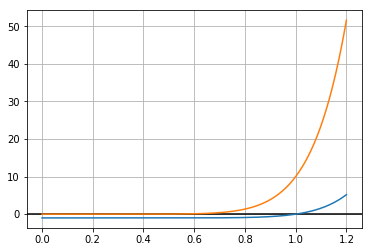

In [0]:
def ejemplo2(x):
    y=x**10 - 1
    return y
def ejemplo2der(x):
    y=10*x**9
    return y
x = np.linspace(0,1.2,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejemplo2(x))
plt.plot(x,ejemplo2der(x))

In [0]:
newton(ejemplo2,ejemplo2der,0.6,0.02,50)

Iteración    x1           error       
1            10.462903    15722514207.884666
2            9.416613     5482101728.191406
3            8.474951     1911490678.7913942
4            7.627456     666495587.8827727
5            6.864711     232392641.6525965
6            6.17824      81030303.5182445
7            5.560416     28253519.567669984
8            5.004374     9851392.86628893
9            4.503937     3434968.0335288374
10           4.053543     1197699.0318231848
11           3.648189     417611.5662244791
12           3.283371     145611.8855782623
13           2.955036     50771.4612237076
14           2.659538     17702.6500038244
15           2.3936       6172.2684988409
16           2.154278     2151.8730823637
17           1.938951     750.0479385708
18           1.745314     261.2619021719
19           1.571448     90.8332308848
20           1.416014     31.4098043733
21           1.278782     10.6940523955
22           1.161839     3.4818760569
23           1.0715

In [0]:
newton2(ejemplo2,0.6,1e-6,50)

Iteración    x1           error       
1            10.462903    15722514209.03781
2            9.416613     5482101724.060369
3            8.474951     1911490675.7687583
4            7.627456     666495586.2937068
5            6.864711     232392641.12646028
6            6.17824      81030303.34697454
7            5.560416     28253519.513636306
8            5.004374     9851392.848974792
9            4.503937     3434968.0280387606
10           4.053543     1197699.0300955004
11           3.648189     417611.5656975704
12           3.283371     145611.8854175895
13           2.955036     50771.4611759109
14           2.659538     17702.649990279
15           2.3936       6172.26849512
16           2.154278     2151.8730814309
17           1.938951     750.0479383558
18           1.745314     261.2619020716
19           1.571448     90.8332308423
20           1.416014     31.409804356
21           1.278782     10.6940523887
22           1.161839     3.4818760542
23           1.071578

### Ejercicios :
Para cada una de las siguientes funciones (ecuaciones si igualamos a 0), **dibujar la función  para tener una idea de donde estaría la raíz**, obtener analíticamente la derivada y calcular obtener la raíz utilizando el método de Newton y comprobar con Newton2,  utilizando el valor inicial especificado y usar en todos los casos una precisión de $10^{-5}$ y como máximo 50 iteraciones. *Modificar el código de la función "newton" si queréis imprimir de forma distinta o incluso si queréis haceros vuestro propio código.*


1.- &nbsp;&nbsp;&nbsp;
$
f(x)=e^{-x}-\sin(x)
$<br>
empezando con $x_0 = 0$

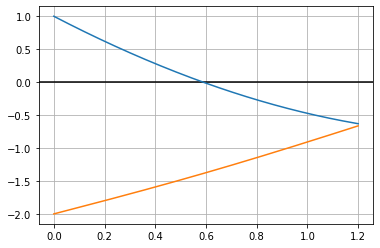

In [0]:
def ejer1(x):
    return np.exp(-x)-np.sin(x)
def ejer1der(x):
    return -np.exp(-x)-np.cos(x)
x = np.linspace(0,1.2,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer1(x))
plt.plot(x,ejer1der(x))

In [0]:
from sympy import *
x = symbols('x')
F0 = exp(-x)-sin(x)
print(diff(F0, x))



-cos(x) - exp(-x)


In [0]:
newton(ejer1,ejer1der,0,1e-5,50)

Iteración    x1           error       
1            0.5          0.1271051211
2            0.585644     0.0040112772
3            0.588529     4.6203e-06  
solución 0.588529
alcanzada en   3 iteraciones
valor de la función = 0.0000046203


In [0]:
newton2(ejer1,0,1e-5,50)

Iteración    x1           error       
1            0.5          0.1271051211
2            0.585644     0.0040112772
3            0.588529     4.6203e-06  
solución 0.588529
alcanzada en   3 iteraciones
valor de la función = 0.0000046203


2.- &nbsp;&nbsp;&nbsp;
$
f(x)=x-0.5\tan(x)
$<br>
empezando con $x_0 = 0$

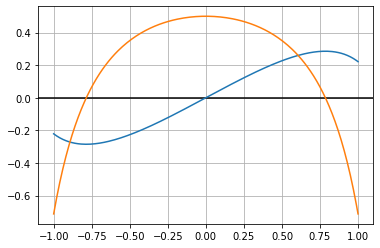

In [0]:
def ejer2(x):
    return x-0.5*np.tan(x)
def ejer2der(x):
    return -0.5*(np.tan(x))**2 + 0.5
x = np.linspace(-1,1,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer2(x))
plt.plot(x,ejer2der(x))

In [0]:
newton(ejer2,ejer2der,-0.25,1e-5,50)

Iteración    x1           error       
1            0.011722     0.00586085  
2            -1e-06       5.371e-07   
solución -0.000001
alcanzada en   2 iteraciones
valor de la función = -0.0000005371


In [0]:
newton2(ejer2,-0.25,1e-5,50)

Iteración    x1           error       
1            0.011722     0.00586085  
2            -1e-06       5.371e-07   
solución -0.000001
alcanzada en   2 iteraciones
valor de la función = -0.0000005371


In [0]:
from sympy import *

x = symbols('x')
F0 = x-0.5*tan(x)
print(diff(F0, x))

-0.5*tan(x)**2 + 0.5


3.- &nbsp;&nbsp;&nbsp;
$
f(x)=4x^{2}-4xe^{-2x}+e^{-4x}
$<br>
empezando con $x_0 = 0$

4.- &nbsp;&nbsp;&nbsp;
$
f(x)=3x^{2}+\ln(x)(2x+\ln(x))-2x^{2}
$<br>
empezando con $x_0 = 0$


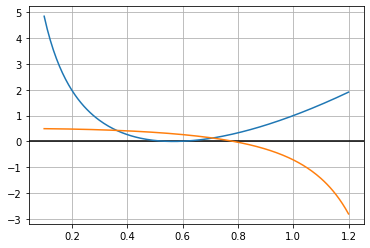

In [0]:
def ejer4(x):
    return 3*x**2+np.log(x)*(2*x+np.log(x))-2*(x**2)
def ejer4der(x):
    return -0.5*(np.tan(x))**2 + 0.5
x = np.linspace(0.1,1.2,200)
plt.grid()
plt.axhline(y=0,color='k')
plt.plot(x,ejer4(x))
plt.plot(x,ejer4der(x))

In [0]:
newton2(ejer4,0.4,1e-5,50)

Iteración    x1           error       
1            0.473756     0.0746969465
2            0.517685     0.0197976486
3            0.541682     0.0050971541
4            0.554224     0.0012932065
5            0.560636     0.0003256941
6            0.563878     8.17243e-05 
7            0.565507     2.04688e-05 
8            0.566325     5.1219e-06  
solución 0.566325
alcanzada en   8 iteraciones
valor de la función = 0.0000051219


5.- &nbsp;&nbsp;&nbsp;
$
f(x)=x^{2}+e^{-2x}-2xe^{-x}
$<br>
empezando con $x_0 = 4$
